<a href="https://colab.research.google.com/github/KevinSathler/MVP_PUC_Analise_de_dados/blob/main/MVP_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MVP análise de dados e boas práticas**
### *Aluno: Kevin Sathler Rêgo Chagas*

## **01. Descrição do problema**

### **A base de dados:**

O dataset utilizado foi um upload de um arquivo .CSV nomeado como "History_TO.csv". Este arquivo foi carregado no mesmo diretório do GitHub que este Collab, de forma que haja maior facilidade na realização do carregamento do arquivo.
Este dataset contém as informações de vendas dos produtos feitos para algumas lojas do estado de São Paulo em determinado período. Neste dataset é possível encontrar o código do produto enviado (barcode) para a loja, a data em que a venda foi realizada, a quantidade vendida para a loja, o código utilizado para identificar a loja que recebeu o produto e a categoria do produto vendido.

**Informações sobre os atributos:**

**PRODUCT_BARCODE__C:** Código de barras do produto (EAN), é a chave que diferencia um produto do outro.

**DATE:** Data de envio do produto para a loja.

**ORIGINAL_QUANTITY__C:** A quantidade unitária do EAN específico, que foi vendida para uma loja específica no dia específico.

**TRANSFER_TO:** Representa o código da loja que receberá o produto.

**TRANSFER_FROM_INVENTORY_NAME:** O código padrão do centro de distribuição que está enviando o produto.

**CATEGORY_LEVEL_1__C:** Representa a categoria do produto que foi enviado á loja.

### **Descrição do problema a ser analisado:**

O dataset que será analisado é primáriamente comercial. Baseado nestes dados queremos chegar a certos insights sobre os comportamentos de vendas, como:
- Categorias de produtos mais vendidas;
- Lojas com mais vendas;
- Lojas com mais vendas das principais categorias;
- Comportamento de venda por categoria de produtos: correlação entre quantidade comprada e nº de transações;
- Comportamento de compra ao decorrer do mês;

Além disso, durante a avaliação espero encontrar dados inconsistentes/outliers que precisem ser tratados ou melhor compreendidos.


### **Conhecimento prévio do problema/dataset:**

A princípio não tenho muitas informações sobre o dadaset, o principal propóito é entender um pouco melhor para conseguir fazer uma associação mental do comportamento logístico observado no dia-a-dia de trabalho com o comportamento de compras dos clientes em cada loja.
As hipóteses iniciais é que há um aumento de compras nos dias do mês relacionados ao pagamento de salário dos funcionários (dia 01, 02, 03 e dias 15, 16 e 17). E acredito que, dado as necessidades diárias dos consumidores, as principais categorias compradas é a de Mercearia.

### **Tratamento prévio de dados e/ou restrições:**

O dataset não foi avaliado anteriormente, foi apenas uma extração do sistema. Porém algumas informações precisam ser avaliadas para garantir a confiabilidade dos dados:
- As datas não podem exceder o períódo extraído de 31 dias;
- Não pode haver quantidades negativas nas e nem zeradas nas transações de vendas;

## **02. Carga de dados**

O pacote Pandas foi utilizado para carregar um arquivo .csv com cabeçalho, o arquivo se encontra anexado no mesmo GitHub deste Collab portanto foi feito um código que acessasse este arquivo atráves de sua URL.

In [11]:
# imports necessários
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# URL direto para o arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/KevinSathler/MVP_PUC_Analise_de_dados/main/TO_History.csv'

# Carregar o conjunto de dados usando o pandas
dados = pd.read_csv(url, header=0)

# Exibir as primeiras linhas do conjunto de dados para verificar se foi carregado corretamente
print(dados.head())

   PRODUCT_BARCODE__C        DATE  ORIGINAL_QUANTITY__C TRANSFER_TO_NAME__C  \
0       7893500020110  30/11/2023                    10              SAO057   
1       7891167011748  30/11/2023                    16              SAO057   
2       7891025200680  30/11/2023                     6              SAO057   
3       7898925943013  30/11/2023                     6              SAO057   
4       7896030520259  30/11/2023                     6              SAO057   

  FROM_INVENTORY_NAME__C     CATEGORY_LEVEL_1__C  
0                 SAO903        MERCEARIA BASICA  
1                 SAO903  MERCEARIA COMPLEMENTAR  
2                 SAO903              LATICINIOS  
3                 SAO903                CERVEJAS  
4                 SAO903              LATICINIOS  


## **03. Análise de dados**

### **03.01. Estatísticas descritivas e correção de dados divergentes**

In [12]:
# Avalia a dimensão do dataset
print(dados.shape)

(247380, 6)


Observa-se, através da análise acima, que o dataset têm 247.380 linhas e 6 colunas. Agora iremos descobrir quais são as colunas e o tipo de informação contido nelas:

In [13]:
# Mostra as informações do dataset
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247380 entries, 0 to 247379
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   PRODUCT_BARCODE__C      247380 non-null  int64 
 1   DATE                    247380 non-null  object
 2   ORIGINAL_QUANTITY__C    247380 non-null  int64 
 3   TRANSFER_TO_NAME__C     247380 non-null  object
 4   FROM_INVENTORY_NAME__C  247380 non-null  object
 5   CATEGORY_LEVEL_1__C     247380 non-null  object
dtypes: int64(2), object(4)
memory usage: 11.3+ MB
None


Verificamos que a coluna 'DATE' está em formato object, quando deveria estar em outro formato, portanto foi feita a correção para estar no formato "Datetime";

In [18]:
# Tente converter para datetime, ignorando os erros
dados['DATE'] = pd.to_datetime(dados['DATE'], format='%d/%m/%Y', errors='coerce')

In [19]:
# Mostra as informações do dataset
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247380 entries, 0 to 247379
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PRODUCT_BARCODE__C      247380 non-null  int64         
 1   DATE                    247380 non-null  datetime64[ns]
 2   ORIGINAL_QUANTITY__C    247380 non-null  int64         
 3   TRANSFER_TO_NAME__C     247380 non-null  object        
 4   FROM_INVENTORY_NAME__C  247380 non-null  object        
 5   CATEGORY_LEVEL_1__C     247380 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 11.3+ MB
None


In [20]:
# Mostra as 10 primeiras linhas do dataset
dados.head(10)

,PRODUCT_BARCODE__C,DATE,ORIGINAL_QUANTITY__C,TRANSFER_TO_NAME__C,FROM_INVENTORY_NAME__C,CATEGORY_LEVEL_1__C
0,7893500020110,2023-11-30,10,SAO057,SAO903,MERCEARIA BASICA
1,7891167011748,2023-11-30,16,SAO057,SAO903,MERCEARIA COMPLEMENTAR
2,7891025200680,2023-11-30,6,SAO057,SAO903,LATICINIOS
3,7898925943013,2023-11-30,6,SAO057,SAO903,CERVEJAS
4,7896030520259,2023-11-30,6,SAO057,SAO903,LATICINIOS
5,7891515008307,2023-11-30,12,SAO057,SAO903,CARNES
6,7891025115335,2023-11-30,6,SAO057,SAO903,LATICINIOS
7,7896423480894,2023-11-30,6,SAO057,SAO903,MERCEARIA COMPLEMENTAR
8,7891000073018,2023-11-30,6,SAO057,SAO903,LATICINIOS
9,7898279790776,2023-11-30,12,SAO057,SAO903,MERCEARIA COMPLEMENTAR


In [21]:
# Mostra as 10 últimas linhas do dataset
dados.tail(10)

,PRODUCT_BARCODE__C,DATE,ORIGINAL_QUANTITY__C,TRANSFER_TO_NAME__C,FROM_INVENTORY_NAME__C,CATEGORY_LEVEL_1__C
247370,7896005803721,2023-12-01,1,SAO007,SAO903,MERCEARIA BASICA
247371,7894904575374,2023-12-01,1,SAO007,SAO903,CONGELADOS
247372,7896205788217,2023-11-30,1,SAO007,SAO903,MERCEARIA BASICA
247373,7891172523472,2023-12-01,2,SAO007,SAO903,CUIDADO PESSOAL
247374,7893000672109,2023-12-01,1,SAO007,SAO903,CONGELADOS
247375,7896029041932,2023-12-01,1,SAO007,SAO903,PETS
247376,736532573964,2023-12-01,4,SAO007,SAO903,LATICINIOS
247377,7896030518294,2023-12-01,1,SAO007,SAO903,LATICINIOS
247378,3500610124389,2023-12-01,2,SAO007,SAO903,ADEGA
247379,7894900180541,2023-12-01,1,SAO007,SAO903,BEBIDAS


Considerando que a coluna "PRODUCT_BARCODE__C" é um identificador de código de produto e não deve ser considerado para as análises estatísticas, só será considerada a coluna "ORIGINAL_QUANTITY__C" para descrição (describe())

In [22]:
#Identificação da descrição das informações (média, 1º quartil, 2º quartil...)
round(dados['ORIGINAL_QUANTITY__C'].describe(),0)

count    247380.0
mean         13.0
std          62.0
min           0.0
25%           6.0
50%           6.0
75%          12.0
max       13300.0
Name: ORIGINAL_QUANTITY__C, dtype: float64

Considerando que há dados com "0" (como pode ser observado no mínimo), entende-se que estes dados estão com algum erro. Pois não há como haver uma venda com 0 unidades, portanto caso isto seja real, será criada uma cópia do dataset removendo as linhas em que há a incidência deste 0.
Porém, para tirar a prova real disto, iremos fazer um visualizador de nulidade (para dados nulos) e um para dados com o valor zero.

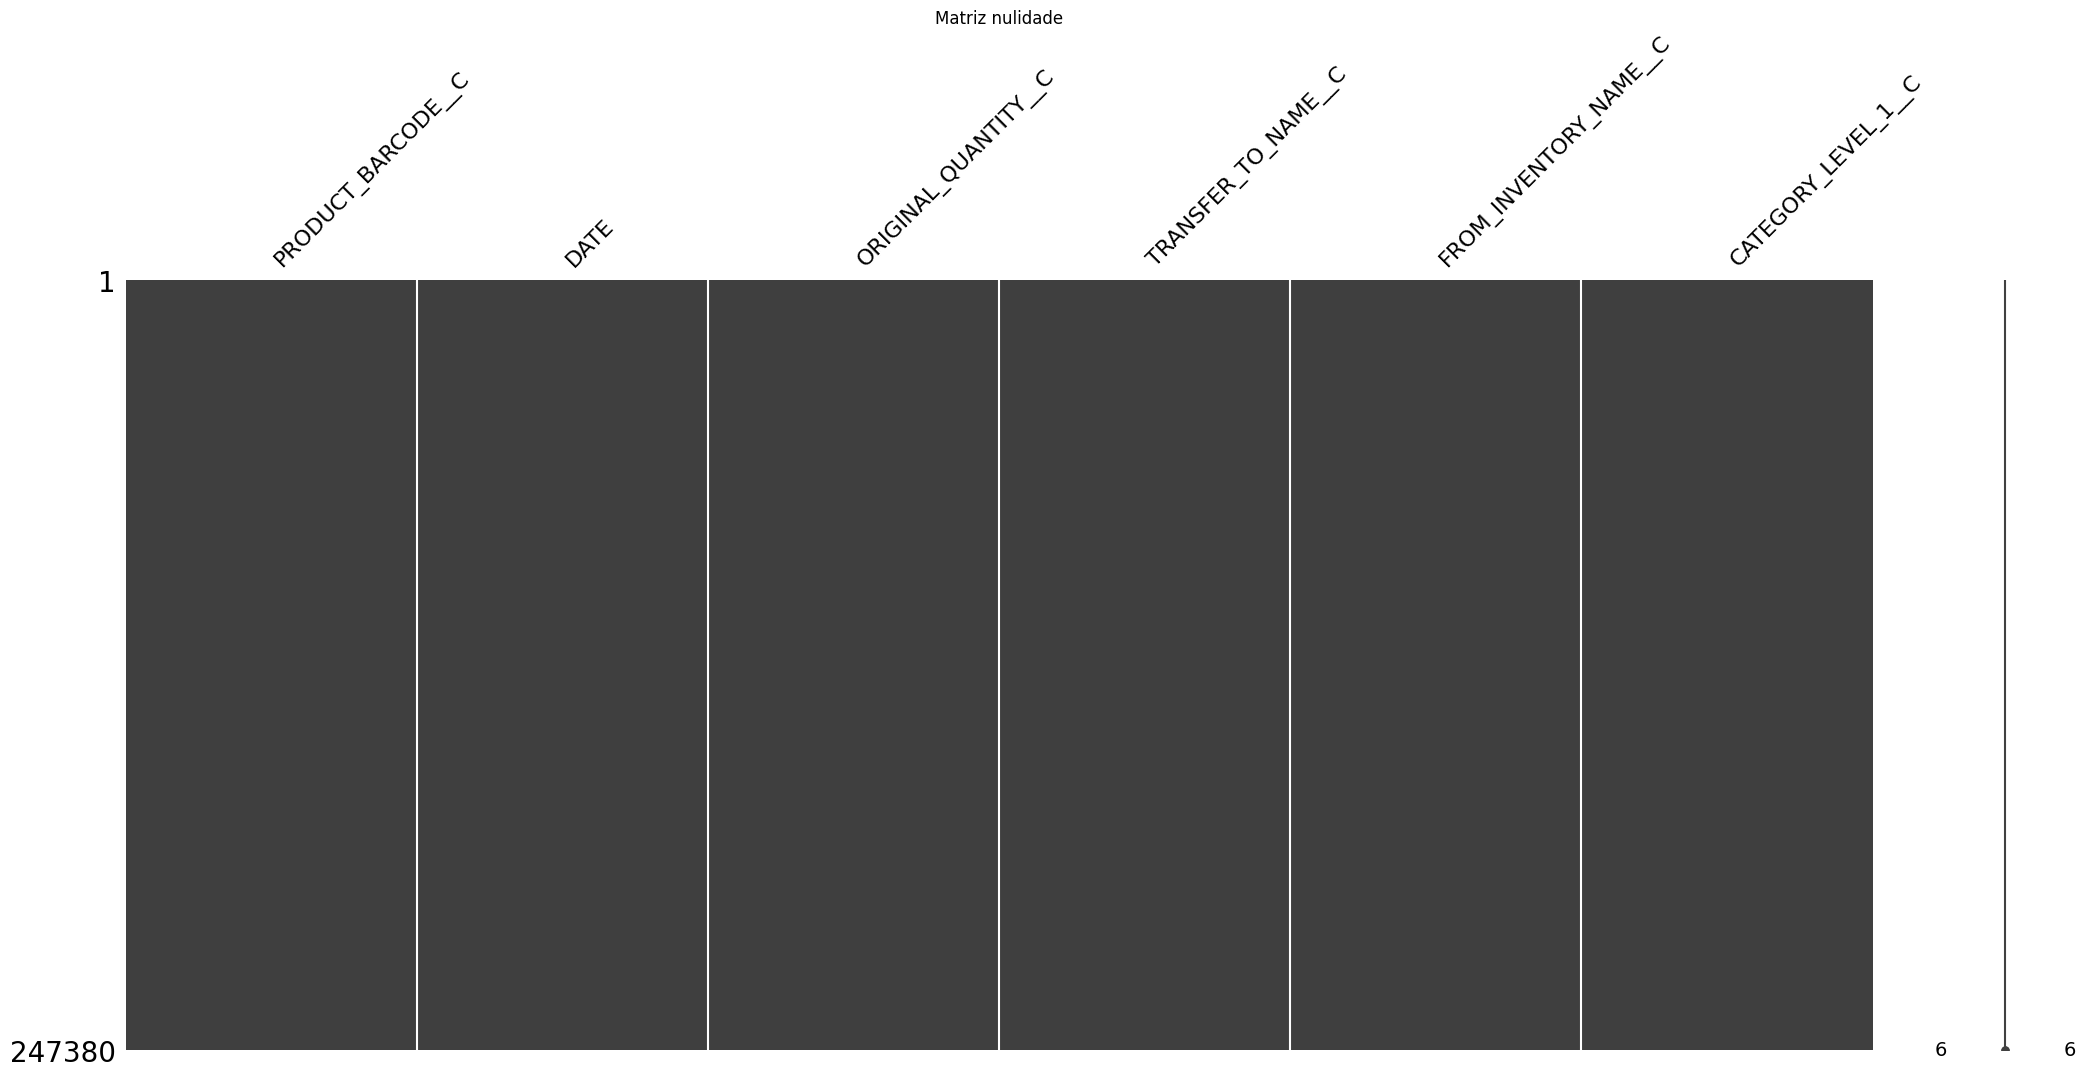

In [23]:
# Avaliação de nulidade
ms.matrix(dados)
plt.title('Matriz nulidade')
plt.show()

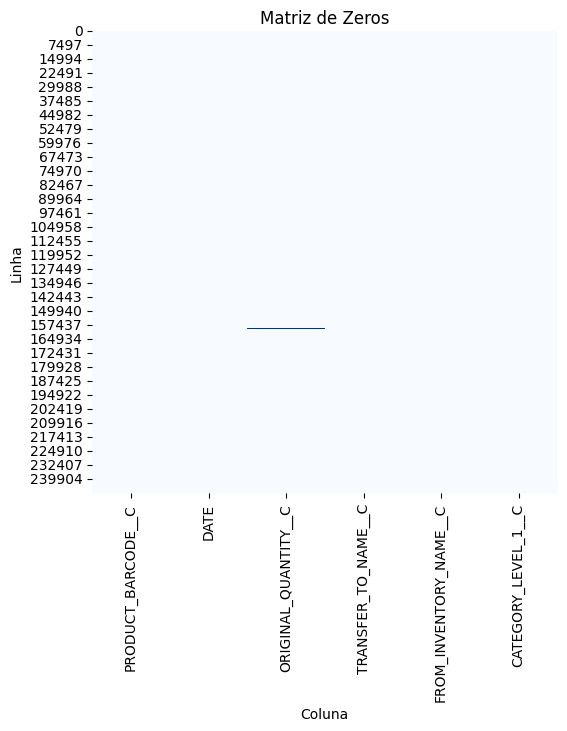

Número de zeros na coluna "ORIGINAL_QUANTITY__C": 602


In [25]:
# Avaliação de zeros
zeros_cont = (dados == 0).astype(int)

# Criar um heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(zeros_cont, cmap="Blues", cbar=False)
plt.title('Avaliação de zeros')
plt.xlabel('Coluna')
plt.ylabel('Linha')
plt.show()

qtd_zeros = (dados['ORIGINAL_QUANTITY__C'] == 0).sum()

print(f'Número de zeros na coluna "ORIGINAL_QUANTITY__C": {qtd_zeros}')

Considerando que a matriz de nulidade informa visualmente que não há espaços nulos, porém o heatmap junto com a descrição abaixo informa que há 602 zeros. Portanto vamos retirar os dados as informaçõs contendo os "zeros"

In [26]:
#Correção das informações para considerar apenas as linhas contendo um valor diferente de 0 em "ORIGINAL_QUANTITY__C"
dados_corrigidos = dados[dados['ORIGINAL_QUANTITY__C'] != 0]


In [27]:
# Mostra as informações do dataset
print(dados_corrigidos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246778 entries, 0 to 247379
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   PRODUCT_BARCODE__C      246778 non-null  int64         
 1   DATE                    246778 non-null  datetime64[ns]
 2   ORIGINAL_QUANTITY__C    246778 non-null  int64         
 3   TRANSFER_TO_NAME__C     246778 non-null  object        
 4   FROM_INVENTORY_NAME__C  246778 non-null  object        
 5   CATEGORY_LEVEL_1__C     246778 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.2+ MB
None


Nota-se, portanto, a redução esperada do número de linhas. Devido as diversas linhas que foram removidas ao realizar este filtro.
Então iremos agora tirar a prova real se ainda há zeros na coluna 'ORIGINAL_QUANTITY__C' e verificar se as colunas possuem dados em branco, para removê-las caso haja.

In [28]:
#Verificação do número de zeros

qtd_zeros = (dados_corrigidos['ORIGINAL_QUANTITY__C'] == 0).sum()

print(f'Número de zeros na coluna "ORIGINAL_QUANTITY__C": {qtd_zeros}')

Número de zeros na coluna "ORIGINAL_QUANTITY__C": 0


In [30]:
# Verifica se a coluna "PRODUCT_BARCODE__C'" possuí dados em branco
dados_em_branco = dados_corrigidos['PRODUCT_BARCODE__C'].isna().sum()
print(dados_em_branco)

0


In [31]:
# Verifica se a coluna "DATE" possuí dados em branco
dados_em_branco = dados_corrigidos['DATE'].isna().sum()
print(dados_em_branco)

0


In [32]:
# Verifica se a coluna "TRANSFER_TO_NAME__C" possuí dados em branco
dados_em_branco = dados_corrigidos['TRANSFER_TO_NAME__C'].isna().sum()
print(dados_em_branco)

0


In [33]:
# Verifica se a coluna "FROM_INVENTORY_NAME__C" possuí dados em branco
dados_em_branco = dados_corrigidos['FROM_INVENTORY_NAME__C'].isna().sum()
print(dados_em_branco)

0


In [34]:
# Verifica se a coluna "CATEGORY_LEVEL_1__C" possuí dados em branco
dados_em_branco = dados_corrigidos['CATEGORY_LEVEL_1__C'].isna().sum()
print(dados_em_branco)

0


Como o período extraído do dataset foi apenas de 31 dias, entnedemos que o período da coluna 'DATE' tem que ser de apenas um mês. Portanto gostaríamos de realizar uma contagem dos diferentes valores encontrados nesta coluna para entender se há mais de 31 ocorrências e verificar a data máxima e data mínima encontradas no dataset.

In [35]:
# Verifica quantas datas diferentes existem na coluna "DATE"
dados_corrigidos['DATE'].nunique()

31

In [36]:
# Verifica a menor data e a maior data na coluna "DATE"
dados_corrigidos['DATE'].unique()

array(['2023-11-30T00:00:00.000000000', '2023-12-02T00:00:00.000000000',
       '2023-12-01T00:00:00.000000000', '2023-11-29T00:00:00.000000000',
       '2023-11-28T00:00:00.000000000', '2023-11-25T00:00:00.000000000',
       '2023-11-22T00:00:00.000000000', '2023-11-24T00:00:00.000000000',
       '2023-11-26T00:00:00.000000000', '2023-11-15T00:00:00.000000000',
       '2023-11-13T00:00:00.000000000', '2023-11-10T00:00:00.000000000',
       '2023-11-14T00:00:00.000000000', '2023-11-27T00:00:00.000000000',
       '2023-11-23T00:00:00.000000000', '2023-11-20T00:00:00.000000000',
       '2023-11-21T00:00:00.000000000', '2023-11-16T00:00:00.000000000',
       '2023-11-17T00:00:00.000000000', '2023-11-18T00:00:00.000000000',
       '2023-11-19T00:00:00.000000000', '2023-11-12T00:00:00.000000000',
       '2023-11-11T00:00:00.000000000', '2023-11-08T00:00:00.000000000',
       '2023-11-09T00:00:00.000000000', '2023-11-07T00:00:00.000000000',
       '2023-11-06T00:00:00.000000000', '2023-11-02

In [37]:
#Deixar registrado as informações de "DATE" na "coluna_datetime"
coluna_datetime = 'DATE'

# Obter o valor mínimo em termos de ordem
menor_data = dados_corrigidos[coluna_datetime].min()
maior_data = dados_corrigidos[coluna_datetime].max()

print(menor_data, maior_data)

2023-11-02 00:00:00 2023-12-02 00:00:00


Observa-se então que não há nenhuma informação nula em nenhuma das demais colunas e, além disso, o período de um mês está sendo avaliado perfeitamente pois nota-se que a data inicial é dia 02/11 e a data final é 02/12 e há 31 ocorrências diferentes nesta coluna

Agora, caso necessário para uso posterior, será compreendida a distribuição de lojas que receberam produtos (TRANSFER_TO_NAME__C), de categorias de produtos ('CATEGORY_LEVEL_1__C'), quantidade total de produtos recebidos por loja e categoria de produtos por loja.

Abaixo, para cada loja qual (TRANSFER_TO_NAME__C)  calculamos o total em unidades (soma da coluna ORIGINAL_QUANTITY__C) e de pedidos feitos neste período (contagem de linhas enviadas para esta loja)

Além disso, será realizado esta mesma contagem segregada por categoria (CATEGORY_LEVEL_1__C). Então calculamos o mesmo número agrupado pelas categorias de cada loja, ou seja, quantas vendas foram feitas de cada categoria para cada loja e quantas unidades foram vendidas de cada categoria para cada loja.

In [ ]:
# Quantidade de lojas que receberam produtos no período
quantidade_lojas = dados_corrigidos['TRANSFER_TO_NAME__C'].nunique()
print(f"É um total de {quantidade_lojas} lojas")

In [42]:
# Lojas que receberam produtos no período
lojas = dados_corrigidos['TRANSFER_TO_NAME__C'].unique()
print(lojas)

['SAO057' 'SAO002' 'SNT002' 'SAO031' 'SAO018' 'SAO032' 'SAO023' 'SAO004'
 'SAO044' 'SAO030' 'SAO035' 'SAO005' 'SAO026' 'SNT001' 'SAO008' 'SAO022'
 'SAO061' 'SAO060' 'SAO020' 'SAO012' 'SAO028' 'SAO007' 'SAO010' 'SAO055'
 'SAO003' 'SAO025' 'SAO011' 'SAO016' 'SAO056' 'SAO040' 'SAO059' 'SAO043'
 'SAO063' 'SAO001' 'SAO033' 'SAO036' 'SAO051' 'SAO017' 'SAO021' 'SAO047'
 'VCP002' 'SAO052' 'SAO046' 'SAO053' 'SAO777' 'SAO009' 'SAO029']


In [40]:
# Quantidade de categorias de produtos que foram enviados nesse período analisado
quantidade_categorias = dados_corrigidos['CATEGORY_LEVEL_1__C'].nunique()
print(f"É um total de {quantidade_categorias} categorias")

É um total de 17 categorias


In [43]:
# Categorias que foram enviadas
categorias = dados_corrigidos['CATEGORY_LEVEL_1__C'].unique()
print(categorias)

['MERCEARIA BASICA' 'MERCEARIA COMPLEMENTAR' 'LATICINIOS' 'CERVEJAS'
 'CARNES' 'CONGELADOS' 'BEBIDAS' 'DESTILADOS E RTD' 'ADEGA'
 'CUIDADO PESSOAL' 'LIMPEZA' 'PADARIA' 'HORTIFRUTI' 'CASA E UTILIDADES'
 'BEBE' 'PETS' 'SUPPLIES DAKI']


In [44]:
#Agurpando as informações de cada loja (unidades e produtos recebidos no período)
agrupado_loja = dados_corrigidos.groupby('TRANSFER_TO_NAME__C').agg(
    Total_Unidades=('ORIGINAL_QUANTITY__C', 'sum'),
    Total_Produtos=('ORIGINAL_QUANTITY__C', 'count')
).reset_index()

print (agrupado_loja)

   TRANSFER_TO_NAME__C  Total_Unidades  Total_Produtos
0               SAO001           72207            6001
1               SAO002           81425            9777
2               SAO003          106238            7583
3               SAO004           92560            6717
4               SAO005          115646            7996
5               SAO007           96082           11126
6               SAO008           96265            6602
7               SAO009           15179            1372
8               SAO010           87707            5953
9               SAO011           64783            4518
10              SAO012          103505            7768
11              SAO016          122919            7936
12              SAO017           50725            4798
13              SAO018           75947            5269
14              SAO020          112578            8136
15              SAO021           48376            4308
16              SAO022           64537            4853
17        

In [45]:
#Agurpando as informações de cada loja (unidades e produtos recebidos no período) por categoria
agrupado_loja_categoria = dados_corrigidos.groupby(['TRANSFER_TO_NAME__C', 'CATEGORY_LEVEL_1__C']).agg(
    Total_Unidades_Categoria=('ORIGINAL_QUANTITY__C', 'sum'),
    Total_Pedidos_Categoria=('ORIGINAL_QUANTITY__C', 'count')
).reset_index()

print (agrupado_loja_categoria)

    TRANSFER_TO_NAME__C     CATEGORY_LEVEL_1__C  Total_Unidades_Categoria  \
0                SAO001                   ADEGA                      1541   
1                SAO001                    BEBE                       100   
2                SAO001                 BEBIDAS                     17854   
3                SAO001                  CARNES                      1236   
4                SAO001       CASA E UTILIDADES                       822   
..                  ...                     ...                       ...   
733              VCP002                 LIMPEZA                      1115   
734              VCP002        MERCEARIA BASICA                      2491   
735              VCP002  MERCEARIA COMPLEMENTAR                      4989   
736              VCP002                 PADARIA                       155   
737              VCP002                    PETS                        88   

     Total_Pedidos_Categoria  
0                        282  
1            

###  03.02. Visualizações e tratativas de dados

Após todo o estudo inicial dos dados, entendendo-os e corrigindo-os, vamos começar a avaliá-los através de gráficos. Durante esta atividade, o principal objetivo é ir desenvolvendo um raciocínio e através de análises e visualizações, chegar á insights. A partir destes insights, novas análises serão criadas e, caso necessário, a correção de dados vistos como outliers ou incongruentes.
Primeiramente, para começar nossas será criado alguns gráficos de linha de forma a entender a distribuição das vendas para as lojas. Portanto serão feitos 2 modelos de gráficos inicalmente:
1. Um gráfico com os dias do período analisado no eixo X, as quantidades totais de vendas no eixo Y (soma da coluna ORIGINAL_QUANTITY__C).
2. O segundo gráfico com os dias do período analisado no eixo X, as contagens de quantas vendas ocorreram no eixo Y (contagem da coluna ORIGINAL_QUANTITY__C).

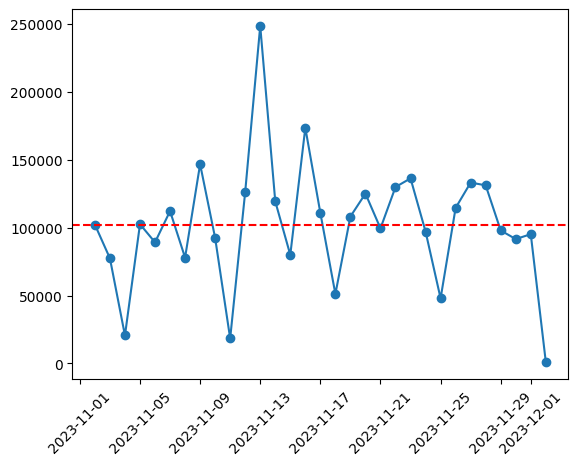

In [46]:
# Gráfico com os dias do período analisado no eixo X, as quantidades totais de vendas no eixo Y (soma da coluna ORIGINAL_QUANTITY__C).

# Foi adicionada uma linha de média, de forma a entender o comportamento dos dados neste período
media_vendas = dados_corrigidos.groupby('DATE')['ORIGINAL_QUANTITY__C'].sum().mean()
soma_diaria = dados_corrigidos.groupby('DATE')['ORIGINAL_QUANTITY__C'].sum()

# Criação do gráfico de lihas
plt.plot(soma_diaria.index, soma_diaria, label='Quantidade Total de Vendas', marker='o')

# Linha horizontal para a média de vendas de todo período
plt.axhline(y=media_vendas, color='red', linestyle='--', label='Média')

# Ajustar as legendas do eixo X para um ângulo de 45º, de forma que facilite a visualização
plt.xticks(rotation=45)

plt.show()

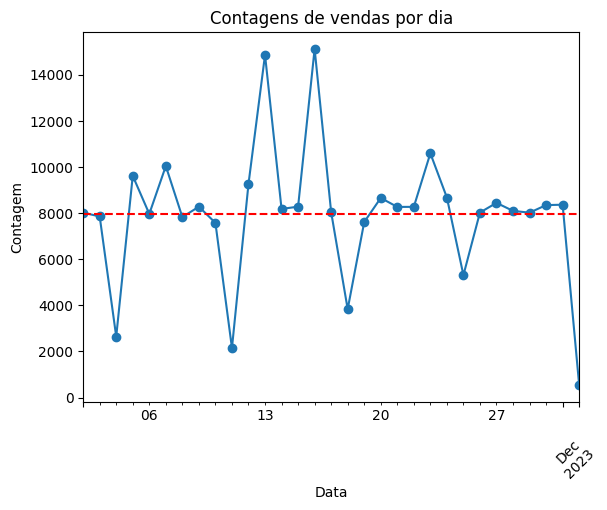

In [47]:
# Gráfico com os dias do período analisado no eixo X, as contagens de quantas vendas ocorreram no eixo Y (contagem da coluna ORIGINAL_QUANTITY__C)
# Foi adicionada uma linha de média, de forma a entender o comportamento dos dados neste período
media_contagem = dados_corrigidos.groupby('DATE')['ORIGINAL_QUANTITY__C'].count().mean()

grf_cont = dados_corrigidos.groupby('DATE')['ORIGINAL_QUANTITY__C'].count().plot(
    kind='line',
    title='Contagens de vendas por dia',
    xlabel='Data',
    ylabel='Contagem',
    marker="o"
)

# Linha horizontal para a média de vendas de todo período
plt.axhline(y=media_contagem, color='red', linestyle='--', label='Média')

# Ajustar as legendas do eixo X para um ângulo de 45º
plt.xticks(rotation=45)

plt.show()

Observa-se uma correlação entre os dois gráficos, portanto há uma proporção de similaridade entre a qunatidade total vendida e o núemro de vendas. Mas não é possível ver uma correlação em todos os pontos, isto indica que há alguns momentos que há variações nos comportamentos de compras.

Para entender a distribuição de vendas, iremos desenhar um gráfico de pizza com a somatória de vendas por categoria e um com a contagem de vendas por categoria.

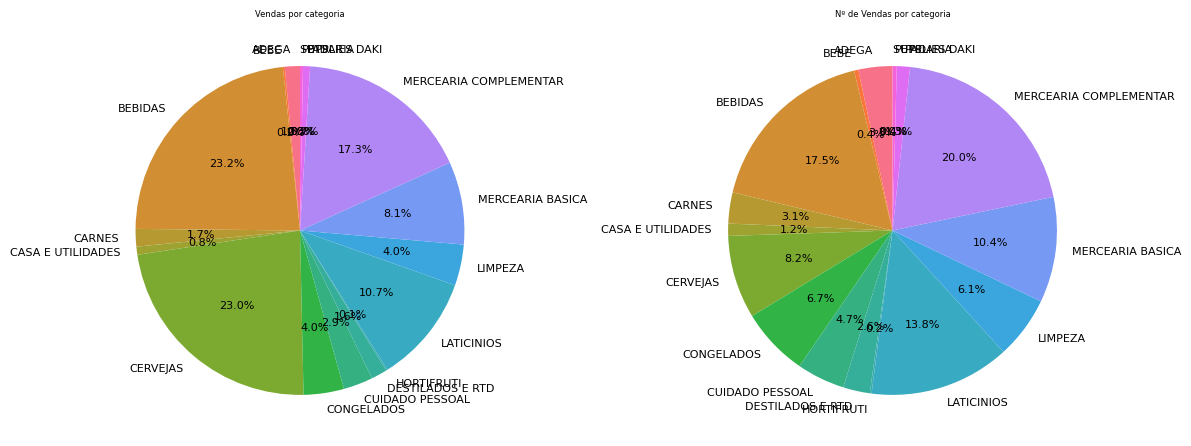

In [48]:
# Somatória de vendas por categoria
soma_por_categoria = dados_corrigidos.groupby('CATEGORY_LEVEL_1__C')['ORIGINAL_QUANTITY__C'].sum()

# Contagem de vendas por categoria
contagem_por_categoria = dados_corrigidos.groupby('CATEGORY_LEVEL_1__C')['ORIGINAL_QUANTITY__C'].count()

# Número de categorias
num_categorias = dados_corrigidos['CATEGORY_LEVEL_1__C'].nunique()

# Definir cores para cada categoria (pode adicionar mais cores conforme necessário)
cores = sns.color_palette("husl", num_categorias)

# Criar gráfico de pizza para a somatória de vendas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(soma_por_categoria, labels=soma_por_categoria.index, autopct='%1.1f%%', startangle=90,  colors=cores, textprops={'fontsize': 8})
plt.title('Vendas por categoria', fontsize=6)

# Criar gráfico de pizza para a contagem de vendas
plt.subplot(1, 2, 2)
plt.pie(contagem_por_categoria, labels=contagem_por_categoria.index, autopct='%1.1f%%', startangle=90, colors=cores, textprops={'fontsize': 8})
plt.title('Nº de Vendas por categoria', fontsize=6)

plt.tight_layout()
plt.show()

Observa-se que as cervejas e bebidas são os itens mais vendidos em quantidades porém não são os mais vendidos em número de vendas. Então entendemos que o padrão de pedidos é comprar maior variedade de produtos de latícinios e mercearia com uma menor quantidade de unidades por produto comprado, porém observa-se que os pedidos de cervejas e bebidas são em quantidades maiores em relação volume porém menores em relação a amplitude.

Agora, ainda falando de um agrupamento total, iremos fazer um gráfico de Pareto para entender o total de unidades vendidas para cada categoria e, com o gráfico de linhas deste Pareto, identificar as 20% categorias que representam a maior quantidade de vendas.

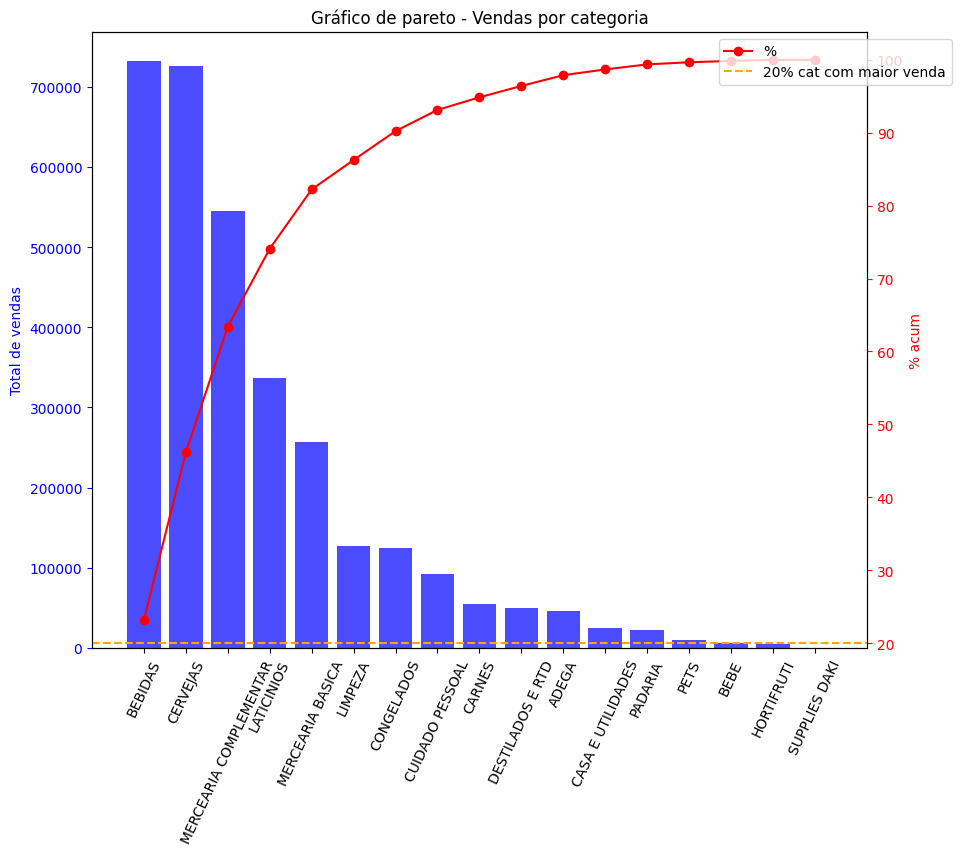

In [49]:
#Somatória de cada categoria com ordenação
total_por_categoria = dados_corrigidos.groupby('CATEGORY_LEVEL_1__C')['ORIGINAL_QUANTITY__C'].sum()
total_por_categoria = total_por_categoria.sort_values(ascending=False)

# Calculando os percentuais de vendas por categoria em relação ao total para uso no Pareto
percentual_ind = total_por_categoria / total_por_categoria.sum() * 100

# Calculando o somatório crescente dos percentuais e definindo os 20% do pareto
percentual_acum = percentual_ind.cumsum()
top_pareto= percentual_acum[percentual_acum <= 20]

# Criando o gráfico de barras e o gráfico de linhas
fig, grf = plt.subplots(figsize=(10, 8))
grf.bar(total_por_categoria.index, total_por_categoria, color='blue', alpha=0.7, label='Total de vendas por cat')
grf.set_ylabel('Total de vendas', color='blue')
grf.tick_params('y', colors='blue')

# Ajustar as legendas do eixo X para um ângulo de 45º
plt.xticks(rotation=65)

# Gráfico de linhas (percentuais acumulativos)
grf2 = grf.twinx()
grf2.plot(percentual_acum.index, percentual_acum, color='red', marker='o', label='%')
grf2.set_ylabel('% acum', color='red')
grf2.tick_params('y', colors='red')

# Adicionando um marcador para indicar até qual categoria representa as 20% com maior quantidade de vendas
grf2.axhline(y=20, color='orange', linestyle='--', label='20% cat com maior venda')

# Configurações gerais
plt.title('Gráfico de pareto - Vendas por categoria')
plt.xlabel('categoria')
plt.legend(loc='upper left', bbox_to_anchor=(0.8, 1))



plt.show()

Baseado no gráfico de Pareto apresentado acima, entede-se que mais de 20% das vendas em unidades é referente a categoria de bebidas. Porém, como há uma quantidade similar na venda de bebidas e cervejas, ambas categorias serão trabalhadas nas análises mais a fundo.
Para dar continuídade ás análises, será feita uma avaliação com um gráfico de distribuição para entender a distribuição de bebidas e cervejas. Dessa forma, será possível identificar a correlação entre o número de vendas e a quantidade vendida para cada loja. Então é possível identificar se as vendas das lojas são resultantes de muitos pedidos menores ou de poucos pedidos maiores.


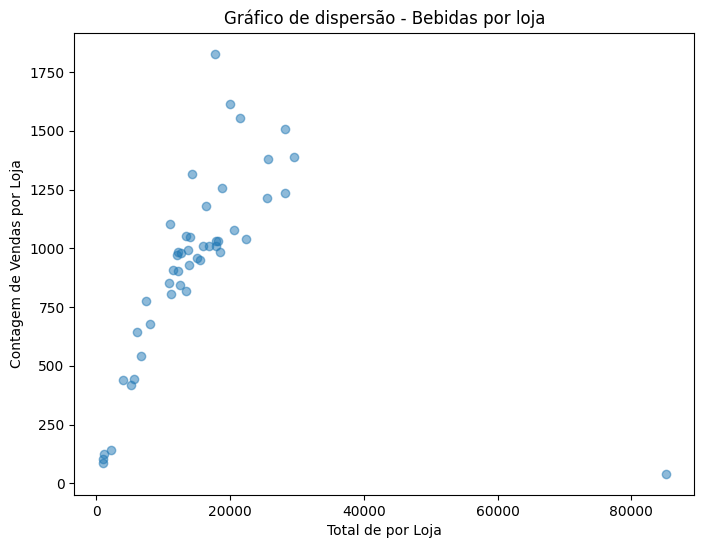

In [51]:
# Filtrando apenas as vendas da categoria "Bebidas"
vendas_bebidas = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == 'BEBIDAS']

# Agrupando por loja e calculando a somatória de vendas e a contagem
grupo_lojas = vendas_bebidas.groupby('TRANSFER_TO_NAME__C').agg({'ORIGINAL_QUANTITY__C': ['sum', 'count']}).reset_index()

# Renomeando colunas para facilitar o acesso
grupo_lojas.columns = ['TRANSFER_TO_NAME__C', 'Unidades', 'Nº de vendas']

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(
    grupo_lojas['Unidades'],
    grupo_lojas['Nº de vendas'],
    alpha=0.5,
    cmap='viridis'
)

# Adicionando rótulos
plt.title('Gráfico de dispersão - Bebidas por loja')
plt.xlabel('Total de por Loja')
plt.ylabel('Contagem de Vendas por Loja')

plt.show()

Através deste gráfico de dispersão nota-se que há certa proporcionalidade na distribuição da quantidade de bebidas vendidas em relação a quantidade de pedidos, com excessão de um ponto mais a direita, onde houve uma venda de bebidas enorme com uma quantidade de pedidos extremamente baixa. Entende-se que esta situação é uma situação extraordinária, portanto iremos descobrir se há alguma característica especial para esta loja que representa o outlier.
Primeiramente adicionaremos rótulos de dados a estes pontos, a fim de identificar qual é o nome desta loja. Posterior a isto, faremos um gráfico de linhas com o histórico de vendas desta loja no decorrer do período análisado, para entender se há alguma falha nos dados ou algum outro caso específico.

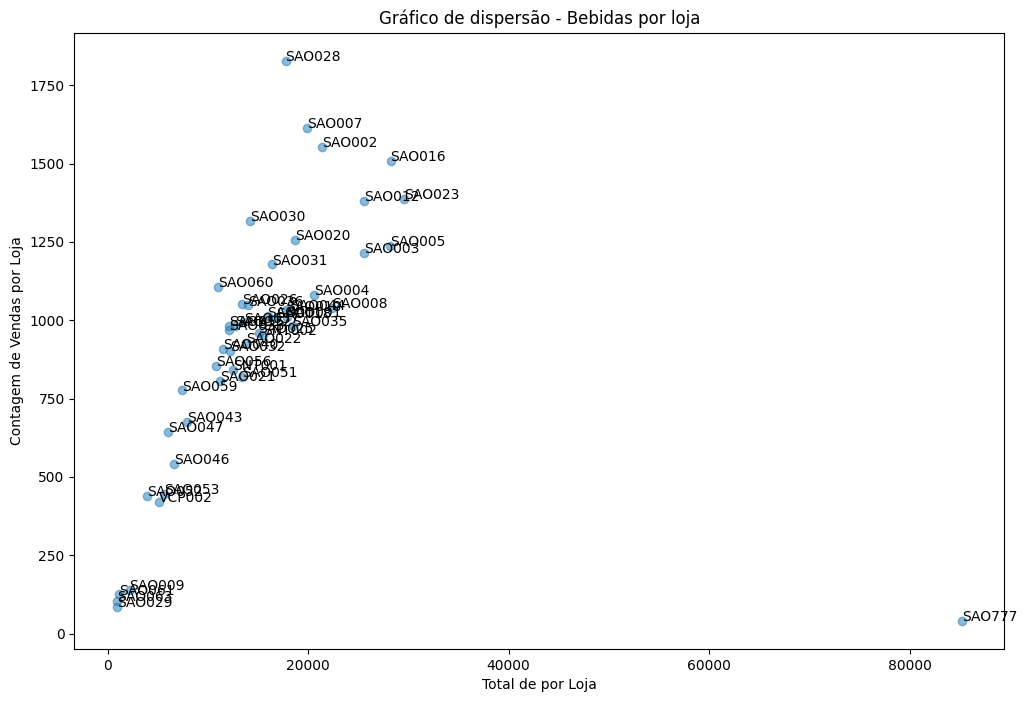

In [52]:
# Criando o gráfico de bolhas
plt.figure(figsize=(12, 8))
plt.scatter(
    grupo_lojas['Unidades'],
    grupo_lojas['Nº de vendas'],
    alpha=0.5,
    cmap='viridis'
)

# Adicionando rótulos no gráfico
plt.title('Gráfico de dispersão - Bebidas por loja')
plt.xlabel('Total de por Loja')
plt.ylabel('Contagem de Vendas por Loja')

# Adicionando rótulos para cada ponto (nome da loja)
for i, loja in enumerate(grupo_lojas['TRANSFER_TO_NAME__C']):
    plt.annotate(loja, (grupo_lojas['Unidades'].iloc[i], grupo_lojas['Nº de vendas'].iloc[i]))
plt.show()

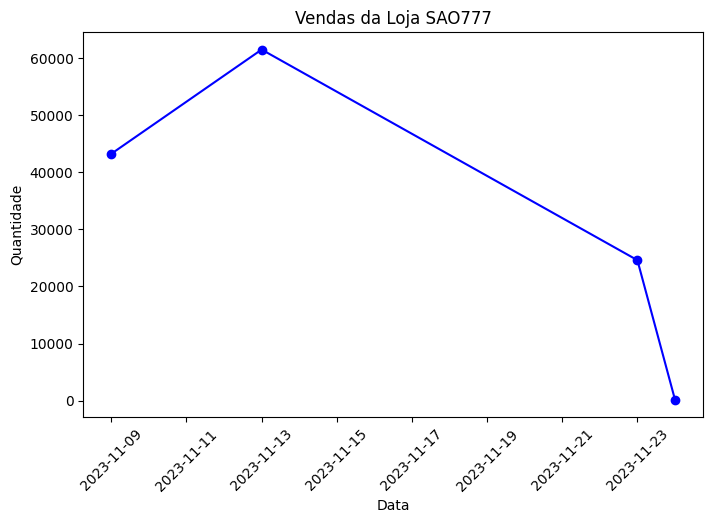

In [53]:
#Filtrando as vendas apenas para a loja de SAO777
vendas_sao777 = dados_corrigidos[dados_corrigidos['TRANSFER_TO_NAME__C'] == 'SAO777']

#Fazendo um somatório para as vendas agrupando por data
vendas_sao777 = vendas_sao777.groupby('DATE')['ORIGINAL_QUANTITY__C'].sum().reset_index()

#Ordenando as dataas
vendas_sao777 = vendas_sao777.sort_values(by='DATE')

#Plotando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(vendas_sao777['DATE'], vendas_sao777['ORIGINAL_QUANTITY__C'], marker='o', linestyle='-', color='blue')

# Adicionando rótulos
plt.title('Vendas da Loja SAO777')
plt.xlabel('Data')
plt.ylabel('Quantidade')

# Ajustando as legendas para um ângulo de 45º
plt.xticks(rotation=45)

plt.show()

Observamos no segundo gráfico que a loja de SAO777 teve apenas 4 dias de vendas, portanto levanto a hipótese de que é uma loja para eventos específicos. Até porquê o código de identificação desta loja não segue o mesmo padrão das demais lojas. Portanto, podemos removê-la de nossas análises como um caso específicos, mas para isso vamos primeiramente
entender quantas vendas tiveram no período todo em relação ao total de vendas de todas as lojas (contagem)

In [54]:
#Contando o número de vendas de SAO777
vendas_sao777 = dados_corrigidos[dados_corrigidos['TRANSFER_TO_NAME__C'] == 'SAO777']
vendas_sao777 = vendas_sao777['ORIGINAL_QUANTITY__C'].count()


#Contando o número de vendas total
vendas_totais = dados_corrigidos['ORIGINAL_QUANTITY__C'].count()

#Calculando qual % do número de vendas
percentual = (vendas_sao777 / vendas_totais) *100
print (f"São {round(percentual,3)} %")

São 0.044 %


Considerando o fato de que o número de vendas desta loja é apenas 0,044% da quantidade de vendas total de todas as lojas, iremos considerar nossa hipótese como válida e removê-la da tabela "dados_corrigidos", de forma que a análise torne-se mais exata.


In [55]:
dados_corrigidos = dados_corrigidos[dados_corrigidos['TRANSFER_TO_NAME__C'] != 'SAO777']

contagem_sao777 = dados_corrigidos[dados_corrigidos['TRANSFER_TO_NAME__C'] == 'SAO777'].shape[0]

print(contagem_sao777)

0


Agora, com a loja outlier sendo removida, vamos fazer um density plot para compreender a distribuição de vendas (contagem) de bebidas e cervejas (segundo o concluído através do nosso Pareto) por loja ao decorrer do período análisado. A finalidade desta avaliação será entender se há um comportamento similar nas lojas no decorrer do período (Ex.: Algum pico de vendas em uma data específica)

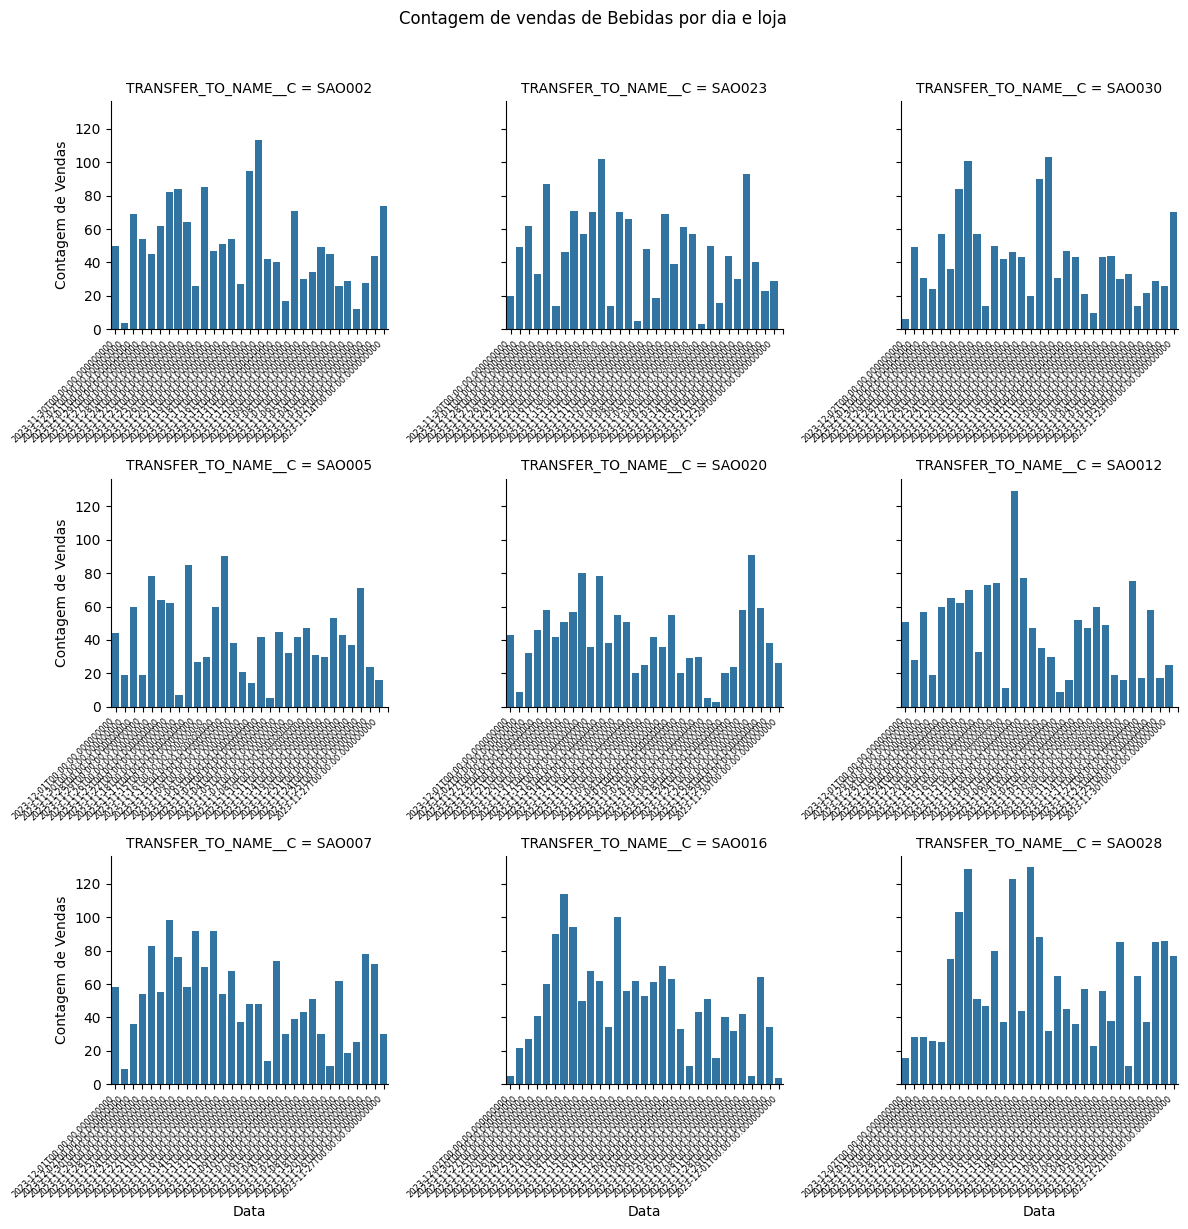

In [59]:
# Filtrando apenas as vendas da categoria "Bebidas"
vendas_bebidas = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == 'BEBIDAS']

# Calculando as top 9 lojas com mais vendas
top_9_lojas = vendas_bebidas.groupby('TRANSFER_TO_NAME__C')['ORIGINAL_QUANTITY__C'].count().nlargest(9).index

# Filtrando a tabela apenas para as top 9 lojas
vendas_top_9_lojas = vendas_bebidas[vendas_bebidas['TRANSFER_TO_NAME__C'].isin(top_9_lojas)]

# Criando subgráficos de barras para cada loja em um layout 3x3
g = sns.FacetGrid(vendas_top_9_lojas, col='TRANSFER_TO_NAME__C', col_wrap=3, height=4, sharex=False)
g.map(sns.countplot, 'DATE')

# Ajustando as legendas do eixo X para um ângulo de 45º e formato dd/mm
g.set(xticks=g.axes[0].get_xticks())
g.set_xticklabels(rotation=45, ha='right', fontsize=6)

# Adicionando rótulos
g.set_axis_labels('Data', 'Contagem de Vendas')
g.fig.suptitle('Contagem de vendas de Bebidas por dia e loja', y=1.02)

plt.tight_layout()
plt.show()

É possível observar acima a distribuição de vendas nas top 9 lojas com o maior número de vendas de bebidas. Porém, é dificil obsesrvar um padrão entre os gráficos, portanto vamos fazer um mapa de calor de vendas destas lojas para observar se há alguma similaridade de comportamento

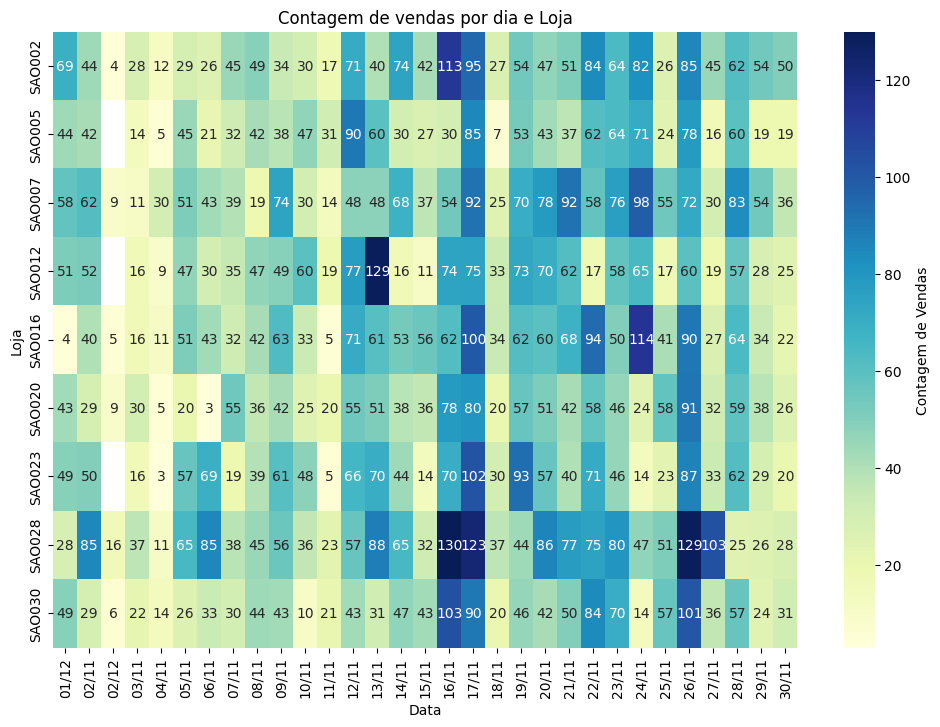

In [61]:
# Garantindo a coluna 'DATE' para datetime
dados_corrigidos['DATE'] = pd.to_datetime(dados_corrigidos['DATE'])

# Extraindo o dia e o mês e formatando como "dd/mm"
dados_corrigidos['DATE'] = dados_corrigidos['DATE'].dt.strftime('%d/%m')

# Filtrando apenas as vendas da categoria "Bebidas"
vendas_bebidas = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == 'BEBIDAS']

# Calculando as top 9 lojas com mais vendas
top_9_lojas = vendas_bebidas.groupby('TRANSFER_TO_NAME__C')['ORIGINAL_QUANTITY__C'].count().nlargest(9).index

# Filtrando a tabela apenas para as top 9 lojas
vendas_top_9_lojas = vendas_bebidas[vendas_bebidas['TRANSFER_TO_NAME__C'].isin(top_9_lojas)]

# Criando uma tabela pivô para o heatmap
heatmap_data = vendas_top_9_lojas.pivot_table(index='TRANSFER_TO_NAME__C', columns='DATE', values='ORIGINAL_QUANTITY__C', aggfunc='count')

# Criando o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Contagem de Vendas'})
plt.title('Contagem de vendas por dia e Loja')
plt.xlabel('Data')
plt.ylabel('Loja')
plt.show()

Observando o mapa de calor é possível observar uma similaridade de comportamento em alguns dias específicos do mês, como por exemplo: um aumento de consumo de bebidas nos dias 16, 17, 26 e 28. Assim como é possível observar uma redução no consumo em dias específicos para todas as lojas, como ocorre nos dias 04 e 05.

Por fim, vamos observar um boxplot para cada categoria para entendermos os dados estatísticos de cada categoria vendida. Entender a distribuição (através dos quartis, média e mediana). Mas para saber quantos gráficos precisarão ser feitos, vamos iniciar contando o número de categorias:

In [62]:
num_categorias = dados_corrigidos['CATEGORY_LEVEL_1__C'].nunique()

print(f"Número de categorias: {num_categorias}")

Número de categorias: 17


Considerando que são 17 categorias, precisaremos de uma visão dos gráficos em um formato 3x6.

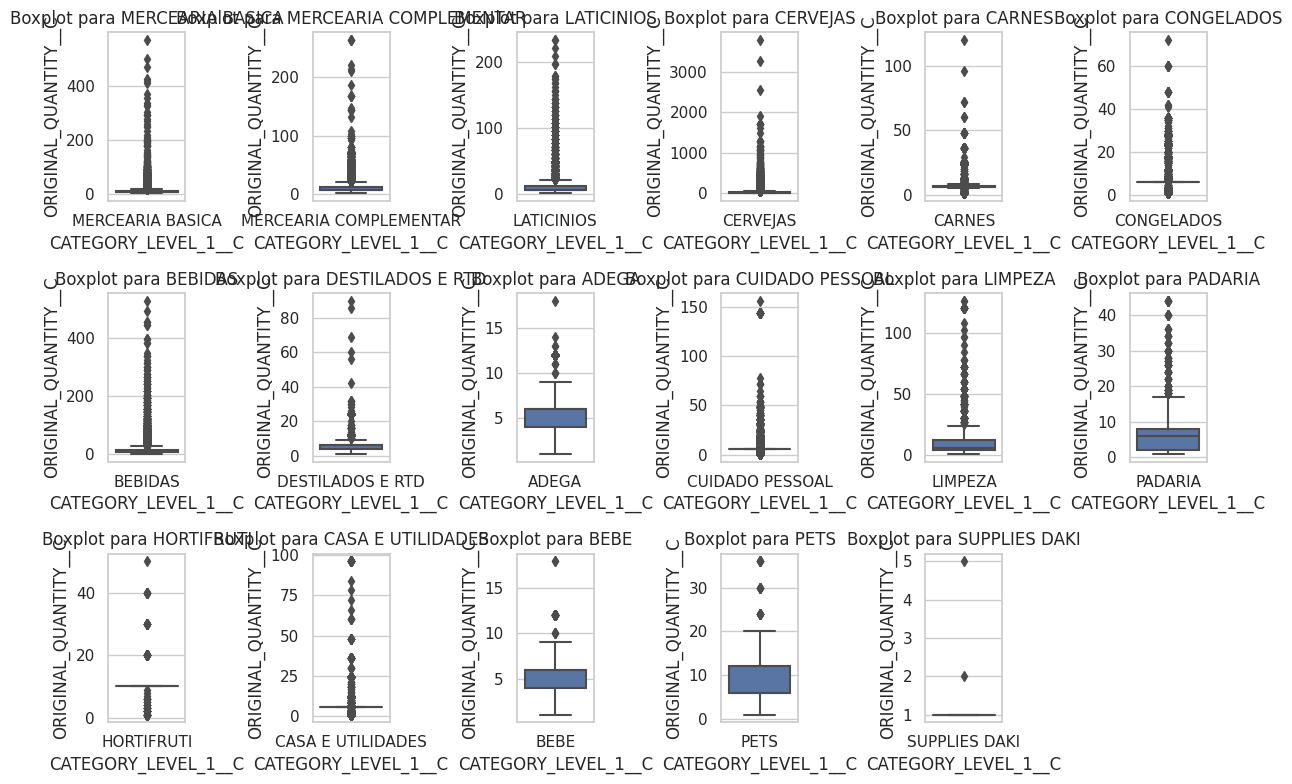

In [63]:
# Criar subgráficos de boxplot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Iterar sobre cada categoria
for i, category in enumerate(dados_corrigidos['CATEGORY_LEVEL_1__C'].unique(), 1):
    plt.subplot(3,6, i)

    # Filtrar dados para a categoria atual
    data_category = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == category]

    # Criar o boxplot
    sns.boxplot(x='CATEGORY_LEVEL_1__C', y='ORIGINAL_QUANTITY__C', data=data_category)

    # Adicionar título
    plt.title(f'Boxplot para {category}')

# Ajustar layout
plt.tight_layout()
plt.show()

Conforme visto nos gráficos anteriores, precisaremos alterar o nome do título do eixo Y e do eixo X, reduzir o tamanho de todos os textos de forma que fiquem visualmente mais aceitáveis. Além disso, observa-se que a maior parte dos gráficos tem muitos pontos outliers, portanto vamos ajustar o tamanho do eixo Y, de forma que ocupe apenas 25% a mais que o 4º quartil, dessa forma trará uma foram mais "visual" para o boxsplot.

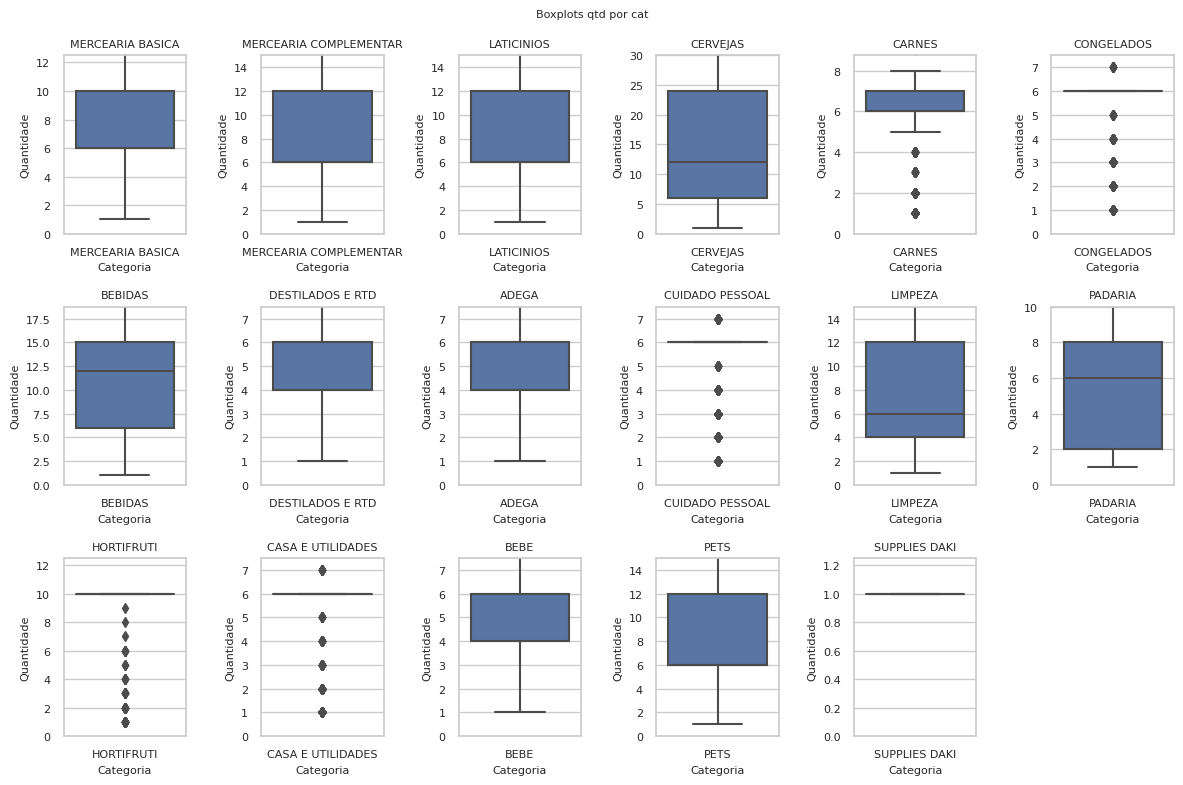

In [67]:
# Criar subgráficos de boxplot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Montar para cada categoria
for i, category in enumerate(dados_corrigidos['CATEGORY_LEVEL_1__C'].unique(), 1):
    plt.subplot(3, 6, i)

    # Filtrar dados para a categoria atual
    dados = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == category]

    # Calcular o 4º quartil
    q4 = dados['ORIGINAL_QUANTITY__C'].quantile(0.75)

    # Criar o boxplot com ylim
    sns.boxplot(x='CATEGORY_LEVEL_1__C', y='ORIGINAL_QUANTITY__C', data=dados)
    plt.ylim(0, q4 * 1.25)

    # Adicionar título
    plt.title(category, fontsize=8)

    # Alterar rótulo do eixo Y
    plt.ylabel("Quantidade", fontsize=8)

    # Alterar rótulo do eixo X
    plt.xlabel("Categoria", fontsize=8)

    # Reduzir tamanho do texto nos rótulos e ticks
    plt.tick_params(axis='both', labelsize=8)

    # Ajustar layout
    plt.suptitle('Boxplots qtd por cat', fontsize=8)

# Ajustar layout
plt.tight_layout()
plt.show()


Por fim, iremos entender a correlação entre  contagem de vendas (contagem de: 'ORIGINAL_QUANTITY__C') com a quantidade de vendas  (somatória de: 'ORIGINAL_QUANTITY__C')  para cada categoria ('CATEGORY_LEVEL_1__C'). Portanto haverão vários gráficos, um para cada 'CATEGORY_LEVEL_1__C' e, através deles, entendermos o comportamento das vendas.

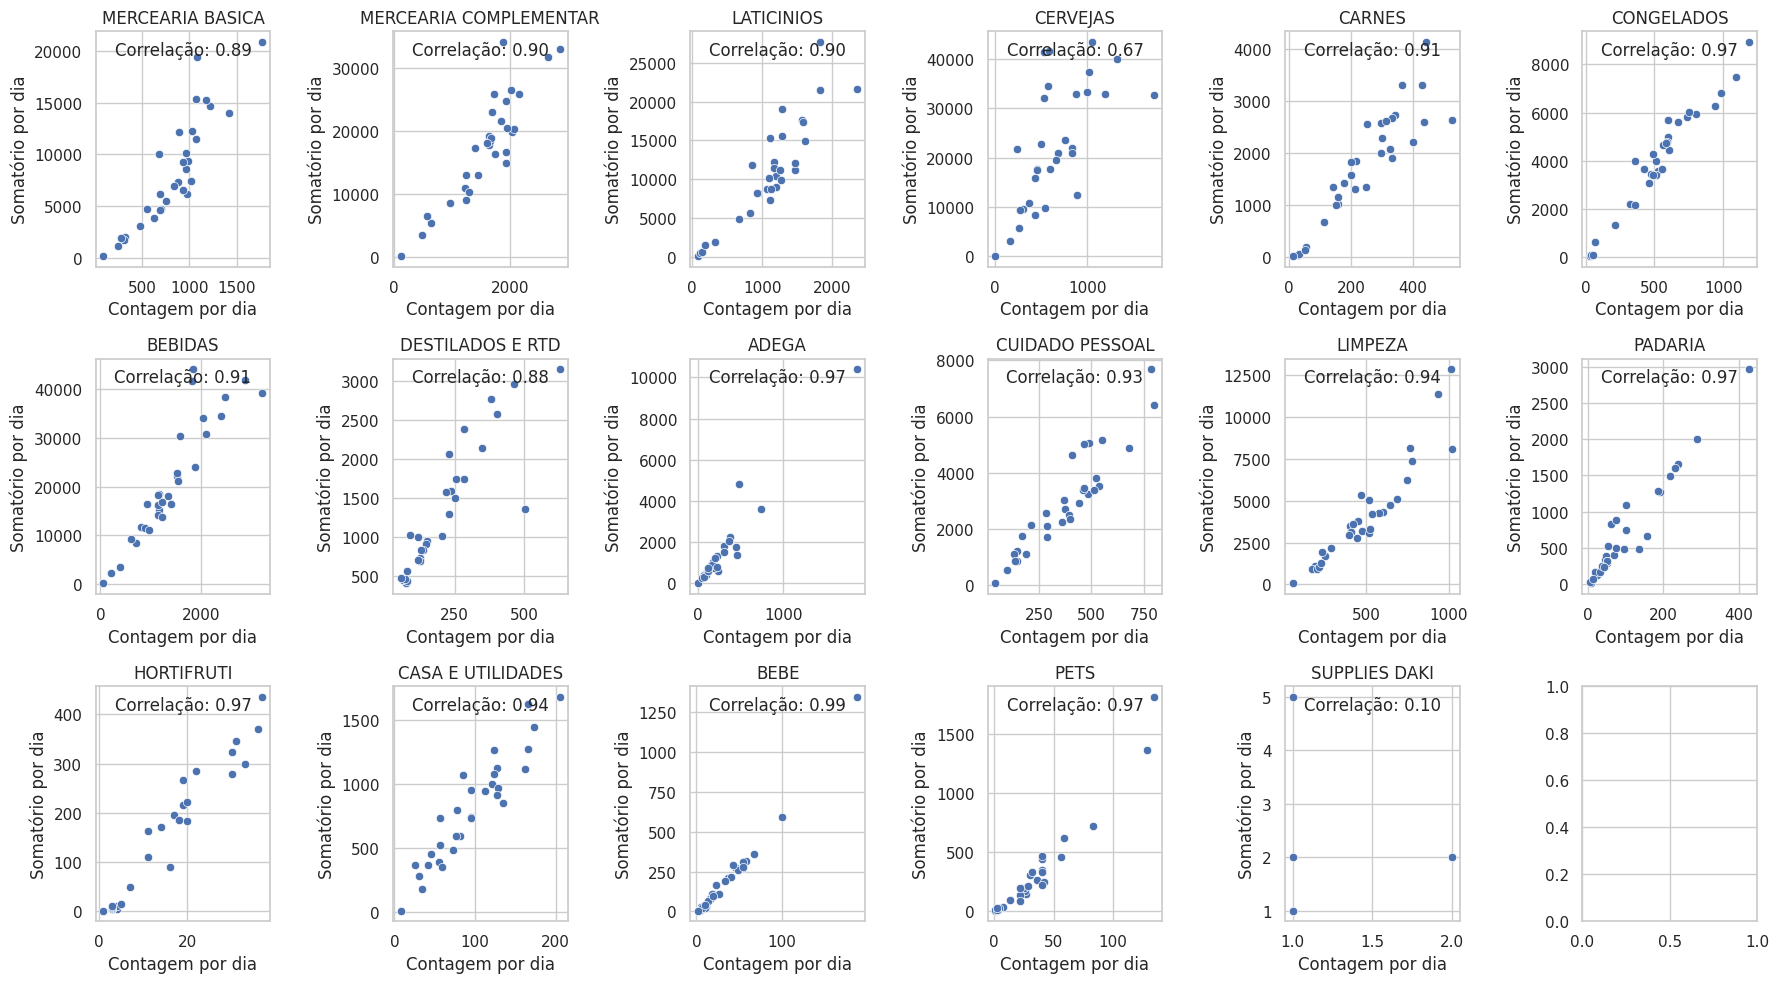

In [68]:
# Agrupar os dados por categoria
categorias = dados_corrigidos['CATEGORY_LEVEL_1__C'].unique()

# Definir o layout da matriz
linhas, colunas = 3, 6
fig, axs = plt.subplots(linhas, colunas, figsize=(18, 10))

# Iterar por cada categoria e criar um gráfico de dispersão
for i, categoria in enumerate(categorias):
    ax = axs[i // colunas, i % colunas]
    dados_categoria = dados_corrigidos[dados_corrigidos['CATEGORY_LEVEL_1__C'] == categoria]

    # Somatório das vendas por dia
    somatorio_vendas = dados_categoria.groupby('DATE')['ORIGINAL_QUANTITY__C'].sum().reset_index()

    # Contagem das vendas por dia
    contagem_vendas = dados_categoria.groupby('DATE')['ORIGINAL_QUANTITY__C'].count().reset_index()

    # Montar o gráfico de dispersão
    sns.scatterplot(x=contagem_vendas['ORIGINAL_QUANTITY__C'], y=somatorio_vendas['ORIGINAL_QUANTITY__C'], ax=ax)
    ax.set_title(f'{categoria}')
    ax.set_xlabel('Contagem por dia')
    ax.set_ylabel('Somatório por dia')

    # Calcular o coeficiente de correlação
    coef_corr, _ = pearsonr(contagem_vendas['ORIGINAL_QUANTITY__C'], somatorio_vendas['ORIGINAL_QUANTITY__C'])
    ax.text(0.5, 0.9, f'Correlação: {coef_corr:.2f}', transform=ax.transAxes, ha='center')

# Ajustar o layout
plt.tight_layout()
plt.show()

Observamos que há uma distribuição bem padrão para a maior parte, tanto que o coeficiente de correlação de Pearson para a maioria das categorias é acima de 0,9. Os únicos que percebemos que não há uma correlação forte são as categorias:
- Cervejas;
- Bebidas;
- Destilados e RTD;
- Supplies Daki;

Entendemos que para estas categorias não há uma correlação forte entre o número de vendas e a quantidade de vendas. Então o comportamento padrão do consumidor pode ser entendido como difernte para estas categorias.

## **04. Separação entre conjunto de treino e conjunto de teste**

Uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

In [72]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dados.values
X = array[:,0:5]
y = array[:,3]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

In [73]:
# Separação em conjuntos de treino e teste (dataset sem missings - 2 colunas a menos!)
array = dados_corrigidos.values
X_sm = array[:,0:5]
y_sm = array[:,3]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação

## **5. Conclusão**

Através deste MVP foi possível colocar em prática os conhecimentos adiquiridos durante o decorrer das aulas e dos estudos. Ao escrever os códigos e desenvolver o raciocínio para compreender a estrutura de dados, pude sanar algumas dúvidas e ter uma maior clarificação sobre a matéria.

Vale ressaltar que todo meu racicínio durante o desenrolar do problema foi registrado. Portanto segui uma estrutura seguindo a cronologia mental para desenvolver o MVP e, durante a consolidação do material fui entendendo o dataset e corrigindo-o conforme achava necessário. Além disso, por algumas vezes ocorreram insights baseado em gráficos e as próximas análises foram totalmente orientadas por estes insights.

Por diversas vezes, tive dificuldades em como lidar com alguns problemas, lógicas e complexidades de como montar gráficos/análises. Porém para superar estas dificuldades utilizei de ferramentas de pesquisas e sites de suporte (como o stackoverflow). E por vezes tive dificuldades em entender algumas coisas as quais pesquisava, ou até mesmo dúvidas sobre a matéria em si e portanto em alguns moemntos precisei recorrer ao auxílio de inteligências artificiais para me trazer uma explicação de códigos encontrados ou até mesmo em como colocar em prática alguns aprendizados.

Portanto além de ter aprendido sobre questões teóricas, questões estatistícas e sobre construções gráficas, aprendi como colocar estes aprendizados em prática. Mas mais que isto, aprendi como investigar caso tenha alguma dúvida e como aprender usando os recursos que as tecnologias de hoje podem oferecer.

Falando do dataset, pude observar a distribuição de vendas em um dataset que muito próximo de um real; Portanto, através deste MVP pude entender um pouco melhor as informações do meu dia-a-dia de trabalho.

Então pude observar as categorias de venda com maior quantidade de transações e com maior profundidade (quantidades compradas por transação). Pude observar o comportamento de lojas (até mesmo levantando uma hipótese da existência de uma loja para eventos - que no posteriori pude confirmar que a hipótese estava condizente com a informação real). Observei comportamentos de compras do consumidor em cada loja e em cada categoria.

Houve uma facilidade em chegar em insights, muito maior do que haveria se observasse os dados em forma de tabela, devido ao uso de gráficos e análises estatísticas que não saberia utilizar antes de ter estudado esta matéria.